In [7]:
"""
branch desde VerMarquetBalnce-sql-2.6.ipynb 

no es continuacion
esta vercion no tiene el metodo OpenerCloserEvaluator

implemente la clase TradePloter completamante funcional y encapsulada para todos los graficos
implementa la clase DBAdapter que encasula los metodos de bbdd

este codigo es capas de leer completamentede desde bbdd y presentar los graficos 
sin realizar ningun calculo de apertura/cierre de posiciones

prendiente:
    
    encapsular calculo de entrada salida en una clase independiente que corra periodicamante online
    crear script mail con multitread que ejecute lectura de dados y calculo de operaciones online 
"""

# imports
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()
#dbg.set_trace() #colocar dondo punto interrupcion

start = time.time()

comCompra = 0.29  
comVenta = 0.19 
spreadEntrada = 0.2 
spreadSalida = 0.2
deltaBaseCH = comCompra + comVenta + spreadEntrada + spreadSalida 

In [8]:
%run "../Clases/DBAdapter.py"

In [9]:
dba = DBAdapter()

BalanceHistory     = dba.ReadBalanceHistory()
tradesCondensation = dba.ReadCondensatedTrades()
myTrades           = dba.ReadMyTrades()

In [10]:
%run "../Clases/TradePloter.py"

Total Trades: 35
total win: 90.8, total commiciones: 30.8, Balance Final 60


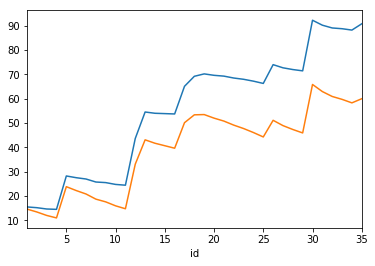

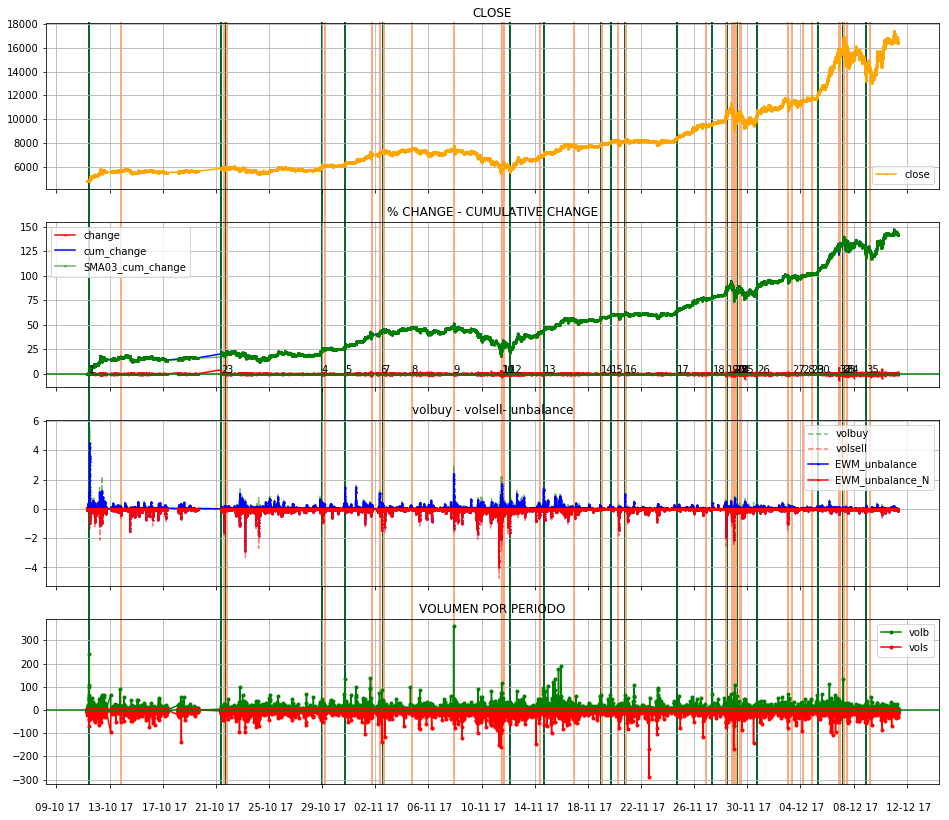

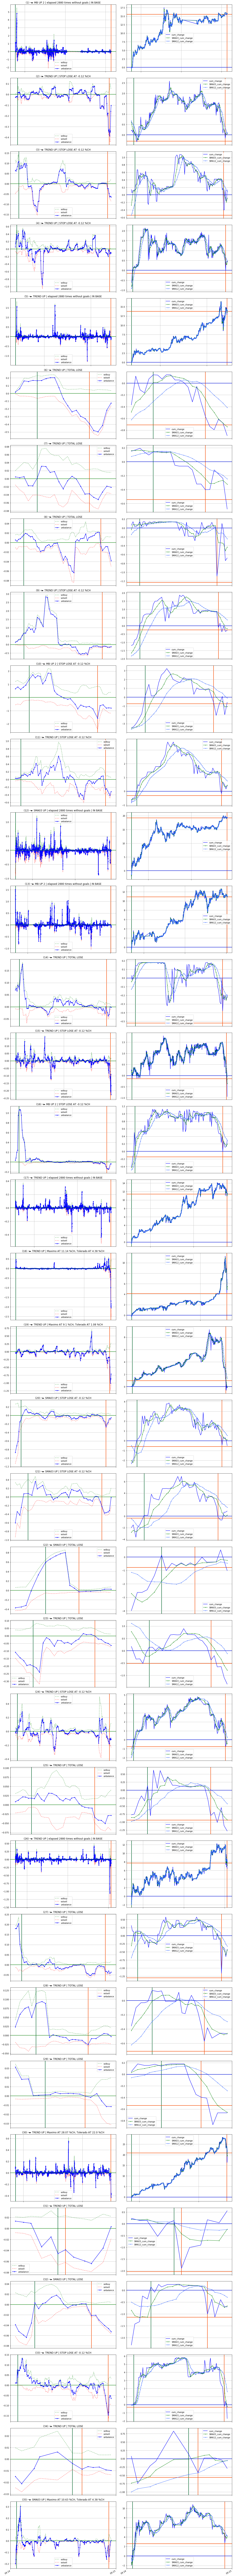

In [11]:
tp = TradePloter(deltaBaseCH, dba.windowTime)
tp.plotProfit(myTrades)
tp.plotHistory(BalanceHistory, myTrades,tradesCondensation, plotVolume= True, plotTrades=True)
tp.plotAllTrades(BalanceHistory, myTrades)


In [12]:
myTrades

,openTime,closeTime,tradeDescription,OpeningTypeID,ClosingTypeID,openingCH,baseCH,targetCH,stopLoseCH,TotalLoseCH,...,deltaCH,openingP,baseP,targetP,stopLoseP,TotalLoseP,closingP,deltaP,Profit,Profit_Gastos
id,,,,,,,,,,,,,,,,,,,,,
1,2017-10-12 04:24:26.189361,2017-10-14 13:16:28.955507,(1) ─► MB UP 2 | elapsed 2880 times without go...,2,3,1.217471,2.097471,22.097471,1.097471,0.717471,...,15.543815,5128.339535,5173.468923,6199.136830,5122.185527,5153.981233,5759.850000,631.510465,15.543815,14.663815
2,2017-10-22 03:13:45.327318,2017-10-22 07:05:26.745735,(2) ─► TREND UP | STOP LOSE AT -0.12 %CH,6,2,19.555289,20.435289,40.435289,19.435289,19.055289,...,-0.307452,5848.354167,5899.819683,7069.490517,5841.336142,5877.595937,5829.983333,-18.370833,15.236363,13.476363
3,2017-10-22 11:42:07.280892,2017-10-22 13:46:26.090417,(3) ─► TREND UP | STOP LOSE AT -0.12 %CH,6,2,21.984751,22.864751,42.864751,21.864751,21.484751,...,-0.542754,5984.446512,6037.109641,7233.998943,5977.265176,6014.368744,5975.893333,-8.553178,14.693609,12.053609
4,2017-10-29 16:47:58.552211,2017-10-29 22:08:36.989587,(4) ─► TREND UP | STOP LOSE AT -0.12 %CH,6,2,24.474615,25.354615,45.354615,24.354615,23.974615,...,-0.145490,6075.476364,6128.940556,7344.035828,6068.185792,6105.853745,6083.353571,7.877208,14.548118,11.028118
5,2017-10-31 10:19:00.711604,2017-11-02 11:20:51.220069,(5) ─► TREND UP | elapsed 2880 times without g...,6,3,26.750873,27.630873,47.630873,26.630873,26.250873,...,13.723083,6212.756250,6267.428505,7509.979755,6205.300943,6243.820031,7073.266667,860.510417,28.271201,23.871201
6,2017-11-03 01:23:19.551393,2017-11-03 01:35:20.422625,(6) ─► TREND UP | TOTAL LOSE,6,4,43.305525,44.185525,64.185525,43.185525,42.805525,...,-0.710353,7270.766667,7334.749413,8788.902747,7262.041747,7307.120500,7224.581081,-46.185586,27.560848,22.280848
7,2017-11-03 07:47:58.947409,2017-11-03 08:00:04.280891,(7) ─► TREND UP | TOTAL LOSE,6,4,45.507840,46.387840,66.387840,45.387840,45.007840,...,-0.541780,7436.930769,7502.375760,8989.761914,7428.006452,7474.115423,7400.382353,-36.548416,27.019068,20.859068
8,2017-11-05 10:41:04.739275,2017-11-05 11:26:53.256482,(8) ─► TREND UP | TOTAL LOSE,6,4,47.873055,48.753055,68.753055,47.753055,47.373055,...,-1.232058,7574.700000,7641.357360,9156.297360,7565.610360,7612.573500,7521.382353,-53.317647,25.787010,18.747010
9,2017-11-08 14:21:10.266576,2017-11-08 15:11:07.869003,(9) ─► TREND UP | STOP LOSE AT -0.12 %CH,6,2,49.663935,50.543935,70.543935,49.543935,49.163935,...,-0.243294,7631.564103,7698.721867,9225.034687,7622.406226,7669.721923,7628.519403,-3.044700,25.543716,17.623716


In [13]:
done = time.time()
elapsed = (done - start)/60
print('{0} minutes'.format(round(elapsed,2)))

1.15 minutes
